In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [3]:
data = pd.read_csv('BTC2019-2024.csv')
close_prices = data['Close']

In [4]:
# Chia dữ liệu thành tập train và test theo tỉ lệ 6:4
train_size = int(len(close_prices) * 0.6)
train, test = close_prices[:train_size], close_prices[train_size:]

In [5]:
# Xây dựng mô hình Holt-Winters trên tập train
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365).fit()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [6]:
# Dự báo cho tập test
predict_test = model.predict(start=test.index[0], end=test.index[-1])

In [7]:
# Tính toán RMSE, MAPE, MSE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rmse_test = sqrt(mean_squared_error(test, predict_test))
mape_test = mean_absolute_percentage_error(test, predict_test)
mse_test = mean_squared_error(test, predict_test)

In [8]:
print("RMSE:", rmse_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)

RMSE: 14734.704913415857
MAPE: 56.743625803785314
MSE: 217111528.88544142


### Dự báo

#### Dự báo 30 ngày

In [9]:
# Dự báo cho 30 ngày tiếp theo
predict_30_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 30)
print(predict_30_days)

1815    47747.117177
1816    47898.021378
1817    47764.839582
1818    47865.538541
1819    47935.287833
1820    47601.924985
1821    47556.683294
1822    46924.473687
1823    46949.363921
1824    46875.995113
1825    46588.249400
1826    46947.188650
1827    47034.326116
1828    47118.417368
1829    46942.799156
1830    47338.130021
1831    47404.022679
1832    47320.049005
1833    46536.619601
1834    46380.694493
1835    46309.851346
1836    46347.720197
1837    43558.495695
1838    44084.152198
1839    43560.659891
1840    43662.805104
1841    43506.579226
1842    43743.374653
1843    43660.166829
1844    44608.606409
1845    44674.972181
dtype: float64


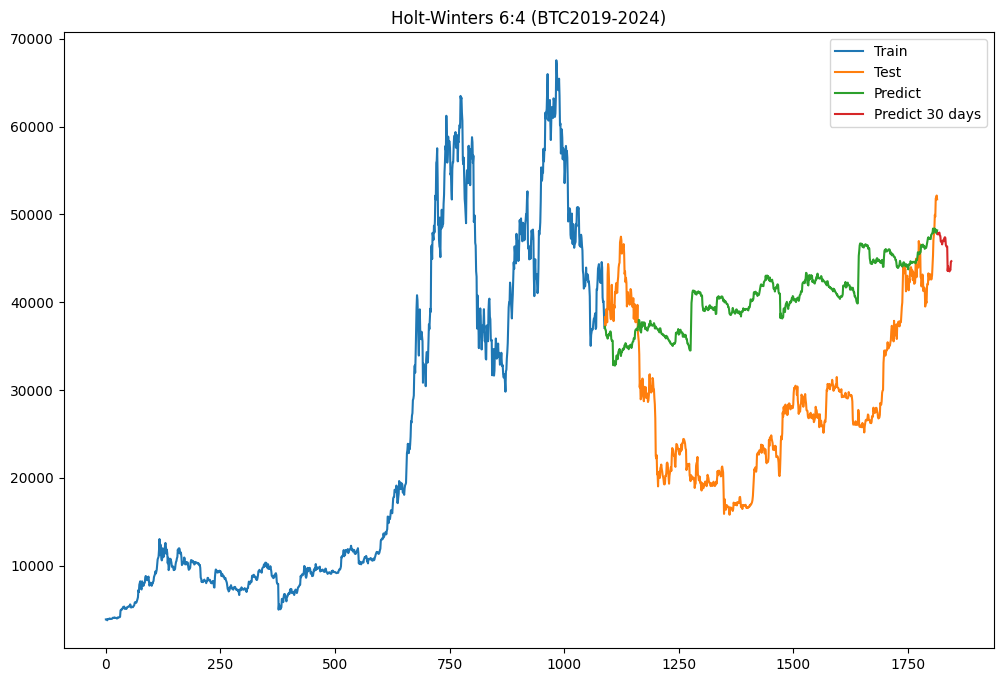

In [10]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 60 ngày

In [11]:
# Dự báo cho 60 ngày tiếp theo
predict_60_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 60)
print(predict_60_days)

1815    47747.117177
1816    47898.021378
1817    47764.839582
1818    47865.538541
1819    47935.287833
            ...     
1871    45376.832903
1872    45723.393604
1873    45774.725085
1874    45785.717032
1875    45895.106023
Length: 61, dtype: float64


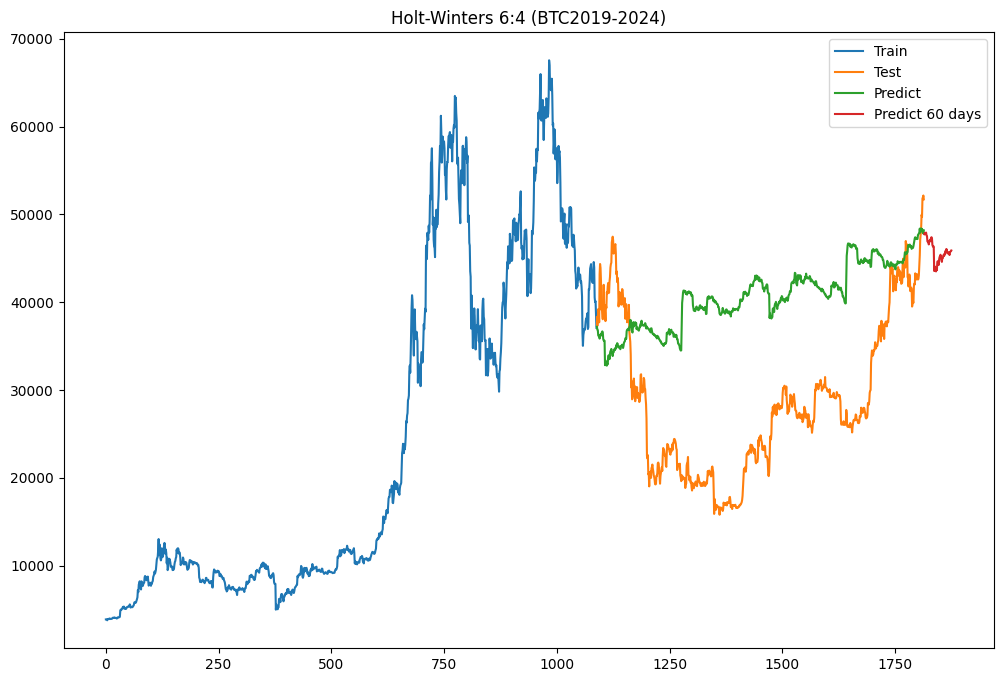

In [12]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.legend(loc='best')
plt.show()

#### Dự báo 90 ngày

In [13]:
# Dự báo cho 60 ngày tiếp theo
predict_90_days = model.predict(start=test.index[-1] + 1, end=test.index[-1] + 1 + 90)
print(predict_90_days)

1815    47747.117177
1816    47898.021378
1817    47764.839582
1818    47865.538541
1819    47935.287833
            ...     
1901    47963.984596
1902    48074.549813
1903    48256.319256
1904    48449.075065
1905    48199.140323
Length: 91, dtype: float64


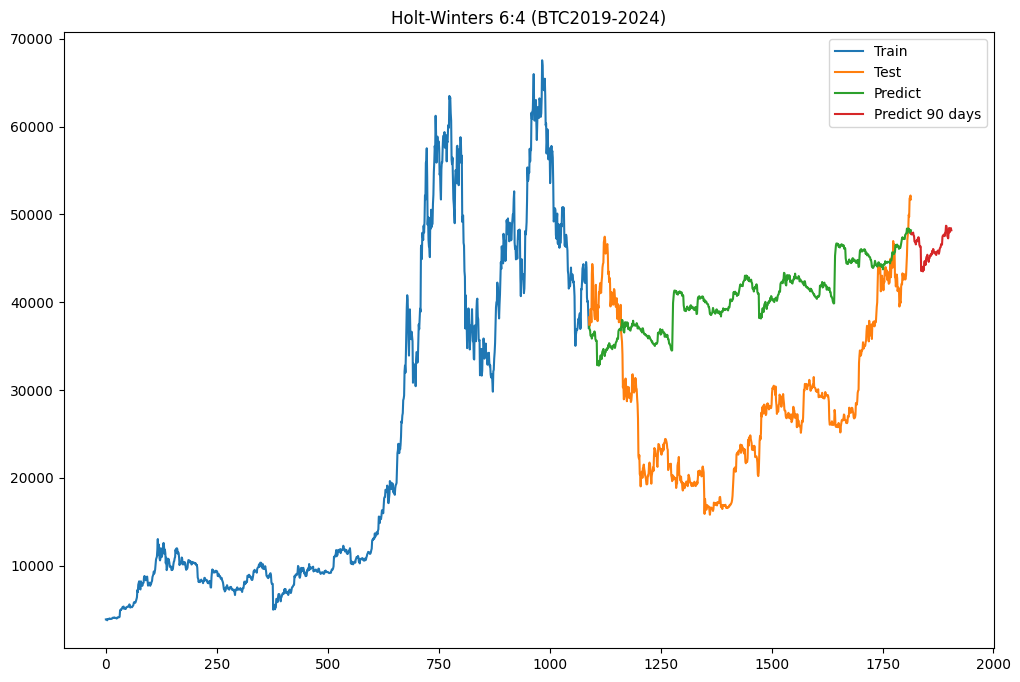

In [14]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()

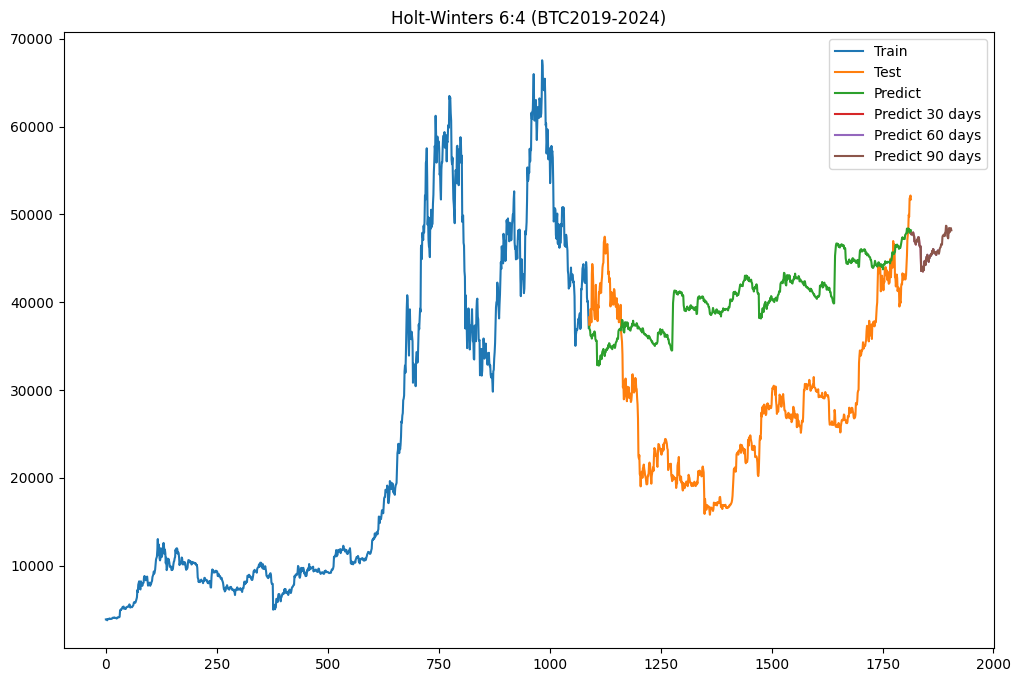

In [15]:
# Trực quan hóa kết quả
plt.figure(figsize=(12, 8))
plt.title('Holt-Winters 6:4 (BTC2019-2024)')
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predict_test.index, predict_test, label='Predict')
plt.plot(predict_30_days.index, predict_30_days, label='Predict 30 days')
plt.plot(predict_60_days.index, predict_60_days, label='Predict 60 days')
plt.plot(predict_90_days.index, predict_90_days, label='Predict 90 days')
plt.legend(loc='best')
plt.show()